##### DO NOT TOUCH THIS PART, DATA HAS BEEN GENERATED AND SAVED AS "complete_data.csv"

In [1]:
# Import Packages
import numpy as np
import cvxpy as cp
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Data Loading
df = pd.read_csv('data/used_cars.csv')
print(list(df.columns))

# data cleaning
df = df.dropna()
df_new = df[df['fuel_type'] != "not supported"]
print(df_new['fuel_type'].unique())
df_new = df_new[df_new['fuel_type'] != '–']

df_new.drop(columns=["model_year", "milage","engine","transmission","ext_col","int_col","accident","clean_title"], inplace=True)

# Remove the dollar sign and convert to numeric
df_new['price'] = df_new['price'].str.replace(r'[$,]', '', regex=True).astype(float)
print(df_new.head())

In [ ]:
df_new["Depreciation Rate"] = [
    0.5 if type == "Plug_In Hybrid" else
    0.65 if type == "Hybrid" else
    0.7 if type == 'E85 Flex Fuel' else
    0.80 if type == "Gasoline" else
    0.95
    for type in df_new["fuel_type"]
]
df_new["Carbon Tax"] = [
    500 if type == "Diesel" else
    200 if type == "Gasoline" else
    150 if type == 'E85 Flex Fuel' else
    120 if type == "Hybrid" else
    50
    for type in df_new["fuel_type"]
]
df_new["Buying Price"] = df_new["price"]*df_new["Depreciation Rate"] + df_new["Carbon Tax"]
df_new["Profit"] = df_new["price"]-df_new["Buying Price"]
# Create the "imported" column, default hybrid and plug-in hybrid rows to 0
df_new['imported'] = np.where(df_new['fuel_type'].isin(['Plug-In Hybrid', 'Hybrid']), 0, np.nan)
# Randomly assign 0 or 1 to the rest of the rows
df_new['imported'] = df_new['imported'].apply(lambda x: np.random.choice([0, 1]) if np.isnan(x) else x)
print(df_new.head())
# add random things:
df_new["size"] = np.random.randint(8,11,size=len(df_new))
print(df_new.head())

In [ ]:
df_new.to_csv("data/complete_data.csv", index=False)

In [2]:
df_analysis = pd.read_csv('data/complete_data.csv')
unique_brands = df_analysis["brand"].unique()
unique_fuel = df_analysis["fuel_type"].unique()

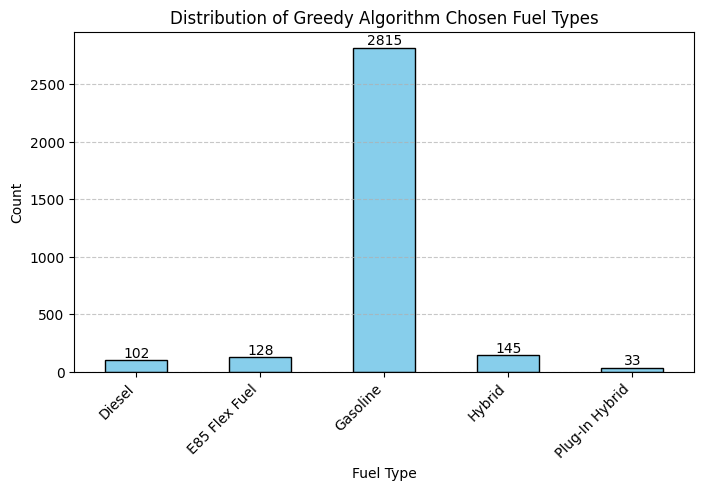

In [ ]:
greedy_selected_fuel = pd.Categorical(df_analysis["fuel_type"], ordered=True)  
fuel_counts = pd.Series(greedy_selected_fuel).value_counts().sort_index()
plt.figure(figsize=(8,5))
fuel_counts.plot(kind="bar", color = "skyblue", edgecolor="black")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.title("Distribution of Fuel Types in the Dataset")
plt.xticks(rotation=45, ha="right", fontsize=10)  # Reduce font size
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.subplots_adjust(bottom=0.2)  # Add padding to prevent label cutoff
for i, value in enumerate(fuel_counts):
    plt.text(i,value +0.5, str(value), ha="center", va="bottom", fontsize=10)
# plt.savefig("data/greedy_budget_fuel.png", dpi=300, bbox_inches="tight")
plt.show()